In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Input , Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from utils import *

2025-04-30 02:49:00.976629: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 02:49:03.058320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745977743.781288   61128 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745977743.978558   61128 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745977745.316837   61128 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
IMG_SIZE = (100,100)
early_stopping = EarlyStopping(monitor='accuracy', patience=20)

In [4]:
def model_cnn(size:tuple[int,int]) -> Sequential:
    model = Sequential()
    model.add(Input((size[0], size[1], 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(96, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(96, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    return model

In [5]:
model_cnn1 = Model("model_cnn1",IMG_SIZE)
model_cnn1.set_model(model_cnn)
model_cnn1.summary()

Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


I0000 00:00:1745977773.160631   61128 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13499 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 100, 100, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 96)       │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 64)       │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,514 (1.29 MB)

 Trainable params: 338,508 (1.29 MB)

 Non-trainable params: 6 (24.00 B)

In [6]:
model_cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model_cnn1.fit(epochs=200, verbose=1, callbacks=[early_stopping])

/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200


I0000 00:00:1745977776.556844   61395 service.cc:152] XLA service 0x7fa7500237b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745977776.556874   61395 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-04-30 02:49:36.743801: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745977777.114529   61395 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-30 02:49:53.681740: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng20{k2=1,k4=2,k5=1,k6=0,k7=0,k19=0} for conv %cudnn-conv-bias-activation.12 = (f32[32,64,98,98]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,100,100]{3,2,1,0} %bitcast.4448, f32[64,3,3,3]{3,2,1,0} %bitcast.4439, f32[64]{0} %bitcast.4498), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasA

 3/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1719 - loss: 1.8021

I0000 00:00:1745977782.090624   61395 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/72 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.1984 - loss: 1.7891

2025-04-30 02:49:58.685689: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng55{k2=8,k13=1,k14=3,k18=1,k22=0,k23=0} for conv %cudnn-conv.10 = (f32[96,2,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,64,3,3]{3,2,1,0} %bitcast.4838, f32[2,64,2,2]{3,2,1,0} %bitcast.4231), window={size=2x2 pad=1_1x1_1 rhs_reversal=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2DBackpropInput" op_name="gradient_tape/sequential_1/conv2d_4_1/convolution/Conv2DBackpropInput" source_file="/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-04-30 02:49:44.141204: E external/local_xla/xla/service/slow_operation_al

72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - accuracy: 0.2556 - loss: 1.7203 - val_accuracy: 0.3399 - val_loss: 1.6984
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ -6s 120ms/step - accuracy: 0.3711 - loss: 1.5758 - val_accuracy: 0.4506 - val_loss: 1.5236
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4101 - loss: 1.4500 - val_accuracy: 0.4506 - val_loss: 1.4209
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4658 - loss: 1.3675 - val_accuracy: 0.5257 - val_loss: 1.2606
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.4890 - loss: 1.3136 - val_accuracy: 0.5613 - val_loss: 1.1117
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5240 - loss: 1.2206 - val_accuracy: 0.5534 - val_loss: 1.1991
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.5365 - loss: 1.1871 - val_accuracy: 0.5455 - val_loss: 1.1016
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.5731 - loss: 1.1251 - val_accuracy: 0.51

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


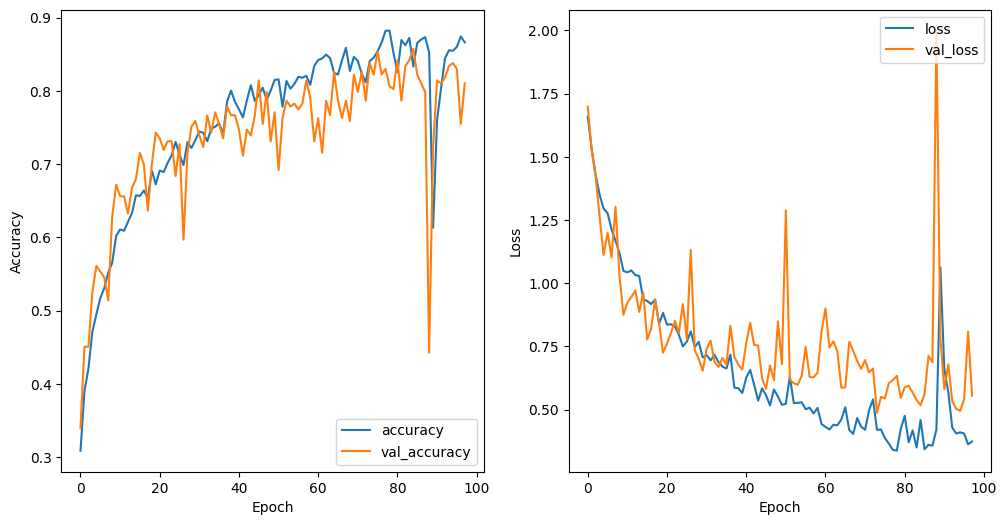

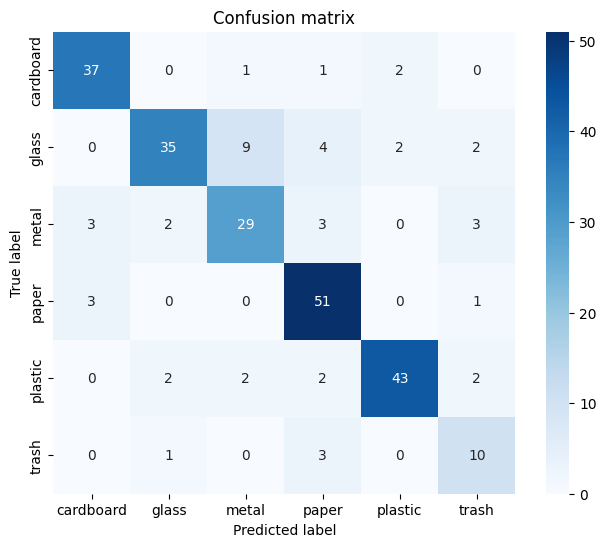

In [8]:
model_cnn1.evaluate()

In [9]:
IMG_SIZE = (128,96)
model_cnn2 = Model("model_cnn2",IMG_SIZE)
model_cnn2.set_model(model_cnn)
model_cnn2.summary()

Found 2274 images belonging to 6 classes.
Found 253 images belonging to 6 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 128, 96, 3)     │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 126, 94, 64)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 45, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 22, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 8, 96)      │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 2, 64)       │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,610 (1.31 MB)

 Trainable params: 342,604 (1.31 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
model_cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_cnn2.fit(epochs=300, verbose=1, callbacks=[early_stopping])

/mnt/c/Users/kkiko/Desktop/CAA/CAA_P1/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 0.2409 - loss: 1.7391 - val_accuracy: 0.3043 - val_loss: 1.6492
Epoch 2/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.3420 - loss: 1.6013 - val_accuracy: 0.4664 - val_loss: 1.4695
Epoch 3/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.4317 - loss: 1.4410 - val_accuracy: 0.4506 - val_loss: 1.4005
Epoch 4/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4462 - loss: 1.3469 - val_accuracy: 0.4822 - val_loss: 1.3121
Epoch 5/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4984 - loss: 1.2787 - val_accuracy: 0.5613 - val_loss: 1.2213
Epoch 6/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.4781 - loss: 1.2953 - val_accuracy: 0.6087 - val_loss: 1.1081
Epoch 7/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.5109 - loss: 1.2385 - val_accuracy: 0.6640 - val_loss: 1.0603
Epoch 8/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.5385 - loss: 1.1753 - val_acc

IOStream.flush timed out


72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.8078 - loss: 0.5061 - val_accuracy: 0.7194 - val_loss: 0.8106
Epoch 65/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.7963 - loss: 0.5588 - val_accuracy: 0.7668 - val_loss: 0.7125
Epoch 66/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.7889 - loss: 0.6152 - val_accuracy: 0.7668 - val_loss: 0.7221
Epoch 67/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.8124 - loss: 0.5152 - val_accuracy: 0.7233 - val_loss: 0.8118
Epoch 68/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8309 - loss: 0.4720 - val_accuracy: 0.7431 - val_loss: 0.7560
Epoch 69/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8347 - loss: 0.4513 - val_accuracy: 0.7352 - val_loss: 0.8277
Epoch 70/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.7966 - loss: 0.5799 - val_accuracy: 0.7787 - val_loss: 0.6460
Epoch 71/300
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.8278 - loss: 0.4859 - val_accuracy:

In [ ]:
model_cnn2.evaluate()

In [ ]:
IMG_SIZE = (512,384)
model_cnn3 = Model("model_cnn3_full",IMG_SIZE)
model_cnn3.set_model(model_cnn)
model_cnn3.summary()

In [ ]:
model_cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_cnn3.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_cnn3.evaluate()

In [ ]:
IMG_SIZE = (256,192)
model_cnn4 = Model("model_cnn4",IMG_SIZE)
model_cnn4.set_model(model_cnn)
model_cnn4.summary()

In [ ]:
model_cnn4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_cnn4.fit(epochs=300, verbose=1, callbacks=[early_stopping])

In [ ]:
model_cnn4.evaluate()